In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import itertools
# import catboost
# from catboost import CatBoostClassifier
# import rb

import pickle

In [2]:
np.random.seed(5000)

In [3]:
Corpus = pd.read_csv(r"data/student_evaluation.csv",encoding='latin-1')
# Corpus.head()
Corpus.Sentiment.unique()

array(['positive', 'neutral'], dtype=object)

In [4]:
test = pd.read_csv(r"data/test.csv",encoding='latin-1')
test.head()
# Corpus.Sentiment.unique()

,comment,Sentiment,Actual
0,Great.,NaN,1
1,I do not know how this course is going to help...,NaN,0
2,all is Perfect.,NaN,1
3,could be more interactive and practical with l...,NaN,0
4,More examples required to get a better grip on...,NaN,0


In [5]:
# Step - a : Remove blank rows if any.
test['comment'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
test['comment'] = [entry.lower() for entry in test['comment']]

# Step - c : Tokenization : In this each entry in the test will be broken into set of words
test['comment']= [word_tokenize(entry) for entry in test['comment']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(test['comment']):
    # Declaring Empty List to store the words that follow the rules for this step
    final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    test.loc[index,'test_final'] = str(final_words)

# print(Final_words)

In [6]:
# Step - a : Remove blank rows if any.
Corpus['comment'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['comment'] = [entry.lower() for entry in Corpus['comment']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['comment']= [word_tokenize(entry) for entry in Corpus['comment']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['comment']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

# print(Final_words)

In [7]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Sentiment'],test_size=0.2)
X_Test= test['test_final']
Corpus['Sentiment'].value_counts()
# Corpus['text_final']
# X_Test.shape()
# Train_X.describe()

neutral     335
positive    306
Name: Sentiment, dtype: int64

In [8]:
# Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['suggestion'],test_size=0.2)
# # Train_X
# # Test_Y.describe()
# # type(Test_Y)
# a = Corpus.to_numpy()
# # a = Train_X.to_numpy()
# a.shape
# nos = a[a=='NO']
# CS = a[a == 'CS']
# IS = a[a == 'IS']

# print(nos.shape)
# print(CS.shape)

# print(IS.shape)
# # yes = a[a=='yes']
# # yes.shape
# # Test_Y.unique()

In [9]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# Test_X.describe

In [10]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
# type(Test_X_Tfidf)
# print(Train_X_Tfidf)
# vectorizer = CountVectorizer(ngram_range=(2,2))
# Tfidf_vect.fit_transform(Corpus['text_final'])

# print(Tfidf_vect.get_feature_names())

# vectorizer = TfidfVectorizer(ngram_range=(2,2)) # You can still specify n-grams here.
# X = vectorizer.fit_transform(arr)

In [11]:
# print(Train_X_Tfidf)

# XGboost


In [12]:
xgb = XGBClassifier(learning_rate=0.01)
xgb.fit(Train_X_Tfidf,Train_Y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [27]:
#pipeline model XGB
text_clf_XGB= Pipeline([('vect', TfidfVectorizer(ngram_range=(1,4))), 
                      ('clf', XGBClassifier(learning_rate=0.01)) ])
# train the model
text_clf_XGB.fit(Train_X,Train_Y)
predicted_XGB = text_clf_XGB.predict(Test_X)
np.mean(predicted_XGB == Test_Y)



/home/rounak/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6511627906976745

In [28]:
#make the predictions with trained model and submit the predictions.
# y_pred=model.predict_classes(X_test)

predictions_Test_XGB = text_clf_XGB.predict(X_Test)

test['Sentiment'] = predictions_Test_XGB
submission = test[["comment","Sentiment","Actual"]]
submission.to_csv("data/results/XGB_submission.csv", index = False)

/home/rounak/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
confusion_matrix_result = confusion_matrix(Test_Y, predicted_XGB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predicted_XGB))

print("\n XGBboost accuracy score -- > ",accuracy_score(Test_Y,predicted_XGB)*100)
print("\n XGBoost precision score -- > ",precision_score(Test_Y, predicted_XGB, average = 'weighted')*100) 

Confusion matrix 
 [[52 10]
 [35 32]]

 Classification report 
              precision    recall  f1-score   support

          0       0.60      0.84      0.70        62
          1       0.76      0.48      0.59        67

avg / total       0.68      0.65      0.64       129


 XGBboost accuracy score -- >  65.11627906976744

 XGBoost precision score -- >  68.29851962169525


In [16]:
# make predictions for test data
y_pred = xgb.predict(Test_X_Tfidf)
predictions_xgboost = [round(value) for value in y_pred]

# evaluate predictions
print("xgboost Accuracy Score -> ",accuracy_score(predictions_xgboost, Test_Y)*100)

confusion_matrix_result = confusion_matrix(Test_Y, predictions_xgboost)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predictions_xgboost))
print("\n xgboost accuracy score -- > ",accuracy_score(Test_Y, predictions_xgboost)*100) 

xgboost Accuracy Score ->  67.44186046511628
Confusion matrix 
 [[60  2]
 [40 27]]

 Classification report 
              precision    recall  f1-score   support

          0       0.60      0.97      0.74        62
          1       0.93      0.40      0.56        67

avg / total       0.77      0.67      0.65       129


 xgboost accuracy score -- >  67.44186046511628


/home/rounak/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


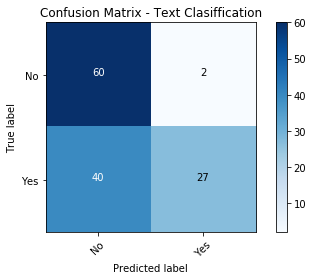

In [17]:
classes = ["No", "Yes"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [19]:
# text_clf_XGB= Pipeline([('vect', TfidfVectorizer()), 
#                       ('clf', XGBClassifier()) ])
# # train the model
# text_clf_XGB.fit(Train_X,Train_Y)

# # Predict the test cases
# # test_x = ['Few more application specific contents is needed. ','Good course.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']
# test_x = [input()]

# predicted_XGB = text_clf_XGB.predict(test_x)
# for x in predicted_XGB:
#     print(x)

# print("XGB Accuracy Score -> ",accuracy_score(predicted_XGB, Test_Y)*100)
